# EDSA - Climate Change Belief Analysis 2022
© Explore Data Science Academy

---
### Honour Code

We {**Team 10**}, confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Predict an individual’s belief in climate change based on historical tweet data


Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, we have created a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Feature Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Classifier Model Selection</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
import nltk
import spacy
from nltk.tokenize import word_tokenize
import re
from sklearn import preprocessing as p
import nltk
from nltk import TreebankWordTokenizer, SnowballStemmer, PorterStemmer
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet 
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, log_loss
nltk.download('averaged_perceptron_tagger')
from sklearn.svm import SVC


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dianaokeyo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/dianaokeyo/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

In [2]:
#Read the train data and view the first few entries
df=pd.read_csv('train.csv')

In [3]:
df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


We observed that our dataset has 3 columns and a total of 15,819 rows. We also observed the dataset contains two numerical varibles and one categorical variable. We also observed that the size of the data is 370.9+ KB.

In [5]:
df.describe()

,sentiment,tweetid
count,15819.000000,15819.000000
mean,0.917504,501719.433656
std,0.836537,289045.983132
min,-1.000000,6.000000
25%,1.000000,253207.500000
50%,1.000000,502291.000000
75%,1.000000,753769.000000
max,2.000000,999888.000000


From the dataset, we've been able to see the mean and a statistical summary of the dataset. We have also observed that the minimum value of the sentiment is **-1** while the maximum value is **2**

In [6]:
#Checking for null objects in train data
df.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

The dataset has no null values which means all entries were appropriately recorded.

<a id="four"></a>
## 4. Feature Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

In [7]:
#Make all tweets into lower case
def lower_case(text):
    text=text.lower()
    return text

In [8]:
x=df['message']

In [9]:
df['message']=df['message'].apply (lambda x: lower_case(x))

<AxesSubplot:xlabel='sentiment', ylabel='count'>

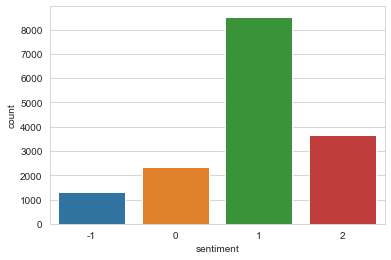

In [10]:
#Before balancing our data
sns.set_style('whitegrid')
sns.countplot(x='sentiment', data=df)

In [11]:
#Separate minority and majority classes and name the sentiments
News=df[df['sentiment']==2]
Pro=df[df['sentiment']==1]
Neutral=df[df['sentiment']==0]
Anti=df[df['sentiment']==-1]

In [12]:
#Checking the lengths of all target values
len(News), len(Pro), len(Neutral), len(Anti)

(3640, 8530, 2353, 1296)

With the varying target lengths, we discovered the data is imbalanced. We will balance the data using the upward resampling method

**Dealing with Imbalanced Data - Balancing**

In [13]:
#Upsample the leading sentiment
def sampling(x, y, z):
    News_upsampled = resample(x,
                              replace=True, # sample without replacement (no need to duplicate observations)
                              n_samples=len(Pro), # match number in minority class
                              random_state=27) # reproducible results
    Neutral_upsampled = resample(y,
                              replace=True, # sample without replacement (no need to duplicate observations)
                              n_samples=len(Pro), # match number in minority class
                              random_state=27) # reproducible results
    Anti_upsampled = resample(z,
                              replace=True, # sample without replacement (no need to duplicate observations)
                              n_samples=len(Pro), # match number in minority class
                              random_state=27) # reproducible results

    # Combine downsampled majority class with minority class
    final_downsampled = pd.concat([News_upsampled, Neutral_upsampled, Anti_upsampled, Pro])
    return final_downsampled

In [14]:
df1=sampling(News,Neutral,Anti)

In [15]:
df1

,sentiment,message,tweetid
4401,2,@cbcquirks #quirkquestions should canada go ah...,634603
11162,2,rt @thinkprogress: interior scientist says the...,793130
3062,2,rt @markdistef: senator malcolm roberts to bre...,990850
5669,2,"rt @sciam: for the third year in a row, the ca...",418438
13403,2,rt @antarcticreport: john kerry leaves nz for ...,29803
...,...,...,...
15807,1,#scottpruit climate change comments would be l...,447067
15811,1,rt @stephenschlegel: she's thinking about how ...,426353
15812,1,rt @sierraclub: 2016: hottest year in history....,989478
15813,1,rt @thinkprogress: epa head falsely claims car...,442853


In [18]:
# Check new class counts
df1['sentiment'].value_counts()

 0    8530
 1    8530
 2    8530
-1    8530
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

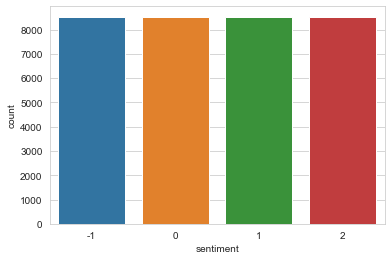

In [19]:
#After balancing the data
sns.set_style('whitegrid')
sns.countplot(x='sentiment', data=df1)

We upscaled the data to balance with the Pro sentiments.

## Cleaning the tweet text - removing noise

Removing noise (i.e. unneccesary information) is a key part of getting the data into a usable format. 
For this dataset, we will be:
making everything lower case
removing punctuation
removing emails and hashtags
removing urls or website links

In [20]:
#Remove urls
def remove_website(text):
    text = re.sub(r"'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*(),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'","", text)
    text = "".join(text)
    return text

In [21]:
#Remove email
def remove_email(text):
    text = re.sub(r"@[\w\.-]+", "", text)
    return text

In [22]:
#Remove hashtags
def remove_hashtags(text):
    text = re.sub(r"#\w+","", text)
    return text

In [23]:
#Remove other unique characters
def remove_unique_char(text):
    text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
    return text

In [24]:
#Remove stopwords
def remove_stopwords(text):
    stop = stopwords.words('english')
    text = " ".join([word for word in text.split() if word not in (stop)])
    return text

**Applying the above functions to the data**

In [25]:
x=df1['message']

In [26]:
df1['message']=df1['message'].apply (lambda x: remove_website(x))

In [27]:
df1['message']=df1['message'].apply (lambda x: remove_email(x))

In [28]:
df1['message']=df1['message'].apply (lambda x: remove_stopwords(x))

In [29]:
df1['message']=df1['message'].apply (lambda x: remove_hashtags(x))

In [30]:
df1['message']=df1['message'].apply (lambda x: remove_unique_char(x))

In [31]:
#Cleaned data
df1

,sentiment,message,tweetid
4401,2,canada go ahead carbon tax usa russia china n...,634603
11162,2,interior scientist says agency retaliated sp...,793130
3062,2,senator malcolm roberts breitbart climate ch...,990850
5669,2,third year row carbon dioxide emissions driv...,418438
13403,2,john kerry leaves nz mcmurdo amp south pole ...,29803
...,...,...,...
15807,1,climate change comments would like nasa sayin...,447067
15811,1,thinking going die husband believe climate c...,426353
15812,1,2016 hottest year history also 2016 182 memb...,989478
15813,1,epa head falsely claims carbon emissions are...,442853


## Tokenisation

A tokeniser divides text into a sequence of tokens, which roughly correspond to "words". We will use tokenisers to clean up the data, making it ready for analysis.

In [32]:
tokeniser = TreebankWordTokenizer()
df1['tokens'] = df1['message'].apply(tokeniser.tokenize)

In [33]:
df1

,sentiment,message,tweetid,tokens
4401,2,canada go ahead carbon tax usa russia china n...,634603,"[canada, go, ahead, carbon, tax, usa, russia, ..."
11162,2,interior scientist says agency retaliated sp...,793130,"[interior, scientist, says, agency, retaliated..."
3062,2,senator malcolm roberts breitbart climate ch...,990850,"[senator, malcolm, roberts, breitbart, climate..."
5669,2,third year row carbon dioxide emissions driv...,418438,"[third, year, row, carbon, dioxide, emissions,..."
13403,2,john kerry leaves nz mcmurdo amp south pole ...,29803,"[john, kerry, leaves, nz, mcmurdo, amp, south,..."
...,...,...,...,...
15807,1,climate change comments would like nasa sayin...,447067,"[climate, change, comments, would, like, nasa,..."
15811,1,thinking going die husband believe climate c...,426353,"[thinking, going, die, husband, believe, clima..."
15812,1,2016 hottest year history also 2016 182 memb...,989478,"[2016, hottest, year, history, also, 2016, 182..."
15813,1,epa head falsely claims carbon emissions are...,442853,"[epa, head, falsely, claims, carbon, emissions..."


## Lemmatization

Lemmatizing is the process of grouping words of similar meaning together. So, your root stem, meaning the word you end up with, is not something you can just look up in a dictionary, but you can look up a lemma.
Sometimes you will wind up with a very similar word, but other times you will wind up with a completely different word.

In [34]:
lemmatizer = WordNetLemmatizer()

In [35]:
def df1_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]    

In [36]:
df1['lemma'] = df1['tokens'].apply(df1_lemma, args=(lemmatizer, ))

In [45]:
df1

,sentiment,message,tweetid,tokens,lemma
4401,2,canada go ahead carbon tax usa russia china n...,634603,"[canada, go, ahead, carbon, tax, usa, russia, ...","[canada, go, ahead, carbon, tax, usa, russia, ..."
11162,2,interior scientist says agency retaliated sp...,793130,"[interior, scientist, says, agency, retaliated...","[interior, scientist, say, agency, retaliated,..."
3062,2,senator malcolm roberts breitbart climate ch...,990850,"[senator, malcolm, roberts, breitbart, climate...","[senator, malcolm, robert, breitbart, climate,..."
5669,2,third year row carbon dioxide emissions driv...,418438,"[third, year, row, carbon, dioxide, emissions,...","[third, year, row, carbon, dioxide, emission, ..."
13403,2,john kerry leaves nz mcmurdo amp south pole ...,29803,"[john, kerry, leaves, nz, mcmurdo, amp, south,...","[john, kerry, leaf, nz, mcmurdo, amp, south, p..."
...,...,...,...,...,...
15807,1,climate change comments would like nasa sayin...,447067,"[climate, change, comments, would, like, nasa,...","[climate, change, comment, would, like, nasa, ..."
15811,1,thinking going die husband believe climate c...,426353,"[thinking, going, die, husband, believe, clima...","[thinking, going, die, husband, believe, clima..."
15812,1,2016 hottest year history also 2016 182 memb...,989478,"[2016, hottest, year, history, also, 2016, 182...","[2016, hottest, year, history, also, 2016, 182..."
15813,1,epa head falsely claims carbon emissions are...,442853,"[epa, head, falsely, claims, carbon, emissions...","[epa, head, falsely, claim, carbon, emission, ..."


In [37]:
#Joining the lemmas together
df1['lemma']=df1['lemma'].apply(lambda tokens: " ".join(map(str, tokens)))

In [38]:
df1['lemma']

4401     canada go ahead carbon tax usa russia china no...
11162    interior scientist say agency retaliated speak...
3062     senator malcolm robert breitbart climate chang...
5669     third year row carbon dioxide emission drive c...
13403    john kerry leaf nz mcmurdo amp south pole meet...
                               ...                        
15807    climate change comment would like nasa saying ...
15811    thinking going die husband believe climate change
15812    2016 hottest year history also 2016 182 member...
15813    epa head falsely claim carbon emission arent c...
15814    took material global warming lgbt right health...
Name: lemma, Length: 34120, dtype: object

In [39]:
df1

,sentiment,message,tweetid,tokens,lemma
4401,2,canada go ahead carbon tax usa russia china n...,634603,"[canada, go, ahead, carbon, tax, usa, russia, ...",canada go ahead carbon tax usa russia china no...
11162,2,interior scientist says agency retaliated sp...,793130,"[interior, scientist, says, agency, retaliated...",interior scientist say agency retaliated speak...
3062,2,senator malcolm roberts breitbart climate ch...,990850,"[senator, malcolm, roberts, breitbart, climate...",senator malcolm robert breitbart climate chang...
5669,2,third year row carbon dioxide emissions driv...,418438,"[third, year, row, carbon, dioxide, emissions,...",third year row carbon dioxide emission drive c...
13403,2,john kerry leaves nz mcmurdo amp south pole ...,29803,"[john, kerry, leaves, nz, mcmurdo, amp, south,...",john kerry leaf nz mcmurdo amp south pole meet...
...,...,...,...,...,...
15807,1,climate change comments would like nasa sayin...,447067,"[climate, change, comments, would, like, nasa,...",climate change comment would like nasa saying ...
15811,1,thinking going die husband believe climate c...,426353,"[thinking, going, die, husband, believe, clima...",thinking going die husband believe climate change
15812,1,2016 hottest year history also 2016 182 memb...,989478,"[2016, hottest, year, history, also, 2016, 182...",2016 hottest year history also 2016 182 member...
15813,1,epa head falsely claims carbon emissions are...,442853,"[epa, head, falsely, claims, carbon, emissions...",epa head falsely claim carbon emission arent c...


In [40]:
#Creating X and y variables using the lemmas and sentiment values
X=df1.lemma.values
y=df1.sentiment.values

In [41]:
#Checking the shape of the cleaned data
df1.message.shape

(34120,)

## Tuning the vectorizer

This function will convert a collection of documents (rows of text) into a matrix of token counts. Here is the parameter that we tuned: 
stop_words: string 'english', list, or None (default)
If 'english', a built-in stop word list for English is used.


In [42]:
vect = CountVectorizer(stop_words='english',
                             min_df=2,
                             max_df=0.5,
                             ngram_range=(1, 2))


train_x_vecs = vect.fit_transform(X)

In [43]:
#Checking the shape of the tuned data using CountVectorizer
train_x_vecs.shape

(34120, 39405)

<a id="five"></a>
## 5. Modeling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

In [44]:
#Splitting the data for training
X_train, X_test, y_train, y_test = train_test_split(train_x_vecs, y, test_size=0.2, random_state = 42)

In [45]:
#Classifying with the multinomial bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

print("The accuracy score of the MNB is:", accuracy_score(y_test, y_pred))
print("\n\nClassification Report:\n\n", classification_report(y_test, y_pred))

The accuracy score of the MNB is: 0.8826201641266119


Classification Report:

               precision    recall  f1-score   support

          -1       0.91      0.98      0.94      1671
           0       0.92      0.86      0.89      1722
           1       0.82      0.81      0.81      1724
           2       0.88      0.89      0.89      1707

    accuracy                           0.88      6824
   macro avg       0.88      0.88      0.88      6824
weighted avg       0.88      0.88      0.88      6824



**Multinomial Bayes Classifier**
It is used for discrete counts. For example, let’s say, we have a text classification problem. Here we can consider bernoulli trials which is one step further and instead of “word occurring in the document”, we have “count how often word occurs in the document”, you can think of it as “number of times outcome number x_i is observed over the n trials”.

We get an accuracy f1-score of 0.88.

In [46]:
#Classifying with logistic regression
clf_log = LogisticRegression()
clf_log.fit(X_train, y_train)
y_pred_L = clf_log.predict(X_test)

print("The accuracy score of the log is:", accuracy_score(y_test, y_pred_L))
print("\n\nClassification Report:\n\n", classification_report(y_test, y_pred_L))

The accuracy score of the log is: 0.9339097303634232


Classification Report:

               precision    recall  f1-score   support

          -1       0.98      0.99      0.98      1671
           0       0.92      0.96      0.94      1722
           1       0.91      0.84      0.87      1724
           2       0.92      0.95      0.93      1707

    accuracy                           0.93      6824
   macro avg       0.93      0.93      0.93      6824
weighted avg       0.93      0.93      0.93      6824



/Users/dianaokeyo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Logistic Regression** makes use of a common S-shaped curve known as the logistic function. This curve is commonly known as a sigmoid. It solves the problem for the following reasons:
It squeezes the range of output values to exist only between 0 and 1.
It has a point of inflection, which can be used to separate the feature space into two distinct areas (one for each class).
It has shallow gradients at both its top and bottom, which can be mapped to zeroes or ones respectively with little ambiguity.

In [47]:
#Classifying with gaussiona bernoulli
gnb = BernoulliNB()
gnb.fit(X_train, y_train)
y_pred_B = gnb.predict(X_test)

print("The accuracy score of the GNB is:", accuracy_score(y_test, y_pred_B))
print("\n\nClassification Report:\n\n", classification_report(y_test, y_pred_B))

The accuracy score of the GNB is: 0.8761723329425557


Classification Report:

               precision    recall  f1-score   support

          -1       0.96      0.94      0.95      1671
           0       0.94      0.83      0.88      1722
           1       0.74      0.87      0.80      1724
           2       0.90      0.87      0.88      1707

    accuracy                           0.88      6824
   macro avg       0.89      0.88      0.88      6824
weighted avg       0.88      0.88      0.88      6824



**Gaussian** It is used in classification and it assumes that features follow a normal distribution. We get an accuracy f1-score of 0.88

In [48]:
#Classifying with support vector classifier
svc = SVC(kernel='rbf', C=12)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print("The accuracy score of the SVC is:", accuracy_score(y_test, y_pred))
print("\n\nClassification Report:\n\n", classification_report(y_test, y_pred))

The accuracy score of the SVC is: 0.9415298944900352


Classification Report:

               precision    recall  f1-score   support

          -1       0.99      0.99      0.99      1671
           0       0.93      0.97      0.95      1722
           1       0.92      0.86      0.89      1724
           2       0.93      0.95      0.94      1707

    accuracy                           0.94      6824
   macro avg       0.94      0.94      0.94      6824
weighted avg       0.94      0.94      0.94      6824



**Support vector classifier** algorithm is to find a hyperplane in the N-dimensional space (N is the number of features) that distinctively classifies the data points. The objective is to find a plane that has the maximum margin i.e the maximum distance between data points of both classes.

## Prediction with unseen data

In [49]:
#Loading test data
test_df =pd.read_csv('test_with_no_labels.csv') # load the data
test_df.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [50]:
#Assigning values to tweetid
tweetid = test_df.tweetid.values

## Cleaning the unseen data - test data

In [51]:
d=test_df['message']

In [52]:
#Removing URls
test_df['message']=test_df['message'].apply (lambda d: remove_website(d))

In [53]:
#Removing emails
test_df['message']=test_df['message'].apply (lambda d: remove_email(d))

In [54]:
#Removing stopwords
test_df['message']=test_df['message'].apply (lambda d: remove_stopwords(d))

In [55]:
#Removing hashtags from tweet messages
test_df['message']=test_df['message'].apply (lambda d: remove_hashtags(d))

In [58]:
#Removing other unique characters
test_df['message']=test_df['message'].apply (lambda d: remove_unique_char1(d))

In [59]:
#Applying tokenisation to the test data
tokeniser = TreebankWordTokenizer()
test_df['tokens'] = test_df['message'].apply(tokeniser.tokenize)

In [62]:
def test_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words] 

In [63]:
#Applying lemmatization to the test data
test_df['lemma'] = test_df['tokens'].apply(test_lemma, args=(lemmatizer, ))

In [64]:
#Joining the lemmas on the test data
test_df['lemma']=test_df['lemma'].apply(lambda tokens: " ".join(map(str, tokens)))

In [65]:
test_df.head(3)

,message,tweetid,tokens,lemma
0,Europe looking China make sure alone fighting ...,169760,"[Europe, looking, China, make, sure, alone, fi...",Europe looking China make sure alone fighting ...
1,Combine polling staffers climate change womens...,35326,"[Combine, polling, staffers, climate, change, ...",Combine polling staffer climate change woman r...
2,The scary unimpeachable evidence climate chang...,224985,"[The, scary, unimpeachable, evidence, climate,...",The scary unimpeachable evidence climate chang...


In [66]:
test_df=test_df.drop(['tweetid','message','tokens'], axis =1)

In [67]:
#Applying the CountVectorizer to test data
vectorizer = CountVectorizer(vocabulary = vect.get_feature_names(), stop_words='english',
                             min_df=2,
                             max_df=0.5,
                             ngram_range=(1, 2))

/Users/dianaokeyo/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [68]:
test_x_vecs = vectorizer.transform(test_df.lemma.values)

<a id="six"></a>
## 6. Classifier Model Selection
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

In [69]:
#Modelling the test data with support vector classifier
svc.fit(X_train, y_train)
y_pred_s = svc.predict(test_x_vecs)

In [70]:
#Modelling the test data with logistic regression
clf_log = LogisticRegression()
clf_log.fit(X_train, y_train)

/Users/dianaokeyo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
y_pred_L = clf_log.predict(test_x_vecs)

In [72]:
#Modelling the test data with gnb classifier
gnb.fit(X_train, y_train)
y_pred_b = gnb.predict(test_x_vecs)

In [73]:
submission = pd.DataFrame(list(zip(tweetid, y_pred_s)), columns = ['tweetid','sentiment'])
submission.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,0


In [74]:
submission.shape

(10546, 2)

In [87]:
submission.to_csv('New submission1.csv', index_label = False, index = False)

In [4]:
pip install streamlit

  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13451 sha256=0e792960c8dabd4445f6ea9c66364fb5a056f296ba83376c5591beec56ce8842
  Stored in directory: c:\users\amand\appdata\local\pip\cache\wheels\b7\a5\68\fe632054a5eadd531c7a49d740c50eb6adfbeca822b4eab8d4
Successfully built blinker
Note: you may need to restart the kernel to use updated packages.


SyntaxError: invalid syntax (<ipython-input-5-c7a1b683aa76>, line 1)

In [9]:
$streamlit hello

SyntaxError: invalid syntax (<ipython-input-9-58228eb44eba>, line 1)